## 2020 ACS Public Use Microdata - Person Records

The Public Use Microdata Sample (PUMS) files contain a sample of the responses to the American Community
Survey (ACS). These surveys are conducted in the United States every 10 years and contains data on approximately one percent of the US population.

The person records file is collected by surveying individuals all across the United States and contains information such as age, race, occupation, vetran status...

Tn this study we explore the relationship between the annual wages of individuals and the information contained in the numerous variables contained in this rich dataset. 

Our analysis begins by importing the data from the website for US Government Census with the below code.
'https://www2.census.gov/acs2008_3yr/pums/csv_pus.zip'.


In [49]:
import pandas as pd
df = pd.read_csv('C:/Users/mak.leks/Desktop/university colorado/Machine Learning/ss08pusb.csv', nrows=250000)

### Data Exploration, Cleaning and Tidying

We begin our exercise by exploring the dataset, cleaning and transforming the data where necessary to better suit our needs.

In [2]:
#load necessary modules
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

Let's begin by checking general description of the data. There is a data dictionary providing a full description of all the variables that can be accessed from the US Census website.

In [3]:
print('The dimensions of our data is',df.shape[0], ' rows and ', df.shape[1], ' columns.')
df.describe().iloc[:,:12]

The dimensions of our data is 50000  rows and  224  columns.


,serialno,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,COW,ENG,FER,GCL
count,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,29719.000000,4403.000000,11515.000000,29586.000000
mean,2.006925e+12,2.177700,673.069120,16.087780,1.055345e+06,32.826540,37.449660,1.202400,2.300010,1.671133,1.929223,1.974853
std,8.312875e+08,1.363466,698.034375,0.282978,2.747881e+04,23.770036,23.502812,0.823922,2.018765,0.944363,0.256464,0.156574
min,2.006000e+12,1.000000,100.000000,16.000000,1.018389e+06,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.006001e+12,1.000000,300.000000,16.000000,1.018389e+06,20.000000,16.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,2.007001e+12,2.000000,500.000000,16.000000,1.055856e+06,28.000000,37.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,2.008000e+12,3.000000,800.000000,16.000000,1.084622e+06,38.000000,56.000000,1.000000,3.000000,2.000000,2.000000,2.000000
max,2.008001e+12,13.000000,3519.000000,17.000000,1.084622e+06,482.000000,93.000000,5.000000,9.000000,4.000000,2.000000,2.000000


We will be studying the effects of the other variables on the indivdual annual wage 'WAGP', so below we examine some summary statistics and visualise the distribution of the data. 

In [5]:
df['WAGP'].describe()

count     39009.000000
mean      20361.071240
std       33894.963105
min           0.000000
25%           0.000000
50%        7900.000000
75%       30000.000000
max      422000.000000
Name: WAGP, dtype: float64

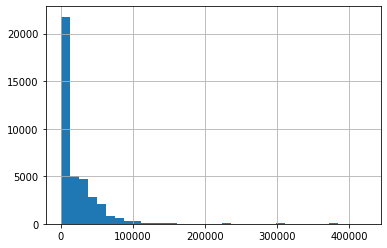

In [38]:
df['WAGP'].hist(bins=34)

In [6]:
df.corr()

,serialno,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,COW,ENG,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
serialno,1.000000,0.008264,-0.276073,-0.344995,-0.997355,-0.004906,-0.000340,-0.022408,0.008563,0.001401,...,-0.009723,0.001694,0.008206,0.005860,-0.004500,-0.000604,0.002834,0.003851,0.000160,0.000635
SPORDER,0.008264,1.000000,0.016805,-0.010415,-0.008657,0.013377,-0.621459,-0.017631,-0.101089,-0.018590,...,0.011832,0.010287,0.009775,0.014243,0.007290,0.008426,0.005625,0.010424,0.007539,0.005601
PUMA,-0.276073,0.016805,1.000000,0.802460,0.264492,0.057674,-0.017127,0.102712,-0.044103,0.033442,...,0.052514,0.036306,0.045858,0.041512,0.038742,0.036798,0.034656,0.038660,0.048007,0.044691
ST,-0.344995,-0.010415,0.802460,1.000000,0.330505,0.010521,0.017091,0.064652,-0.044037,0.019546,...,0.011133,0.001429,0.008733,0.008890,0.002155,-0.000387,0.002952,0.004320,0.011321,0.005752
ADJINC,-0.997355,-0.008657,0.264492,0.330505,1.000000,0.004503,0.000469,0.021957,-0.007286,-0.001399,...,0.009622,-0.001378,-0.008447,-0.005880,0.004156,0.000236,-0.002771,-0.003875,-0.000382,-0.000981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWGTP76,-0.000604,0.008426,0.036798,-0.000387,0.000236,0.769834,-0.085374,0.057148,-0.052802,0.036568,...,0.603394,0.540784,0.611221,0.565786,0.631745,1.000000,0.603335,0.567115,0.630201,0.573118
PWGTP77,0.002834,0.005625,0.034656,0.002952,-0.002771,0.766430,-0.089362,0.051488,-0.051600,0.036643,...,0.565446,0.587741,0.553856,0.600466,0.553796,0.603335,1.000000,0.610320,0.571897,0.573871
PWGTP78,0.003851,0.010424,0.038660,0.004320,-0.003875,0.771553,-0.091740,0.054046,-0.054974,0.039824,...,0.590636,0.570525,0.614031,0.565041,0.601055,0.567115,0.610320,1.000000,0.622606,0.574469
PWGTP79,0.000160,0.007539,0.048007,0.011321,-0.000382,0.782496,-0.087416,0.056388,-0.052590,0.015144,...,0.568451,0.604798,0.562889,0.619424,0.560758,0.630201,0.571897,0.622606,1.000000,0.569642


Let's plot a heat map to visulalise the correlation between the variables.

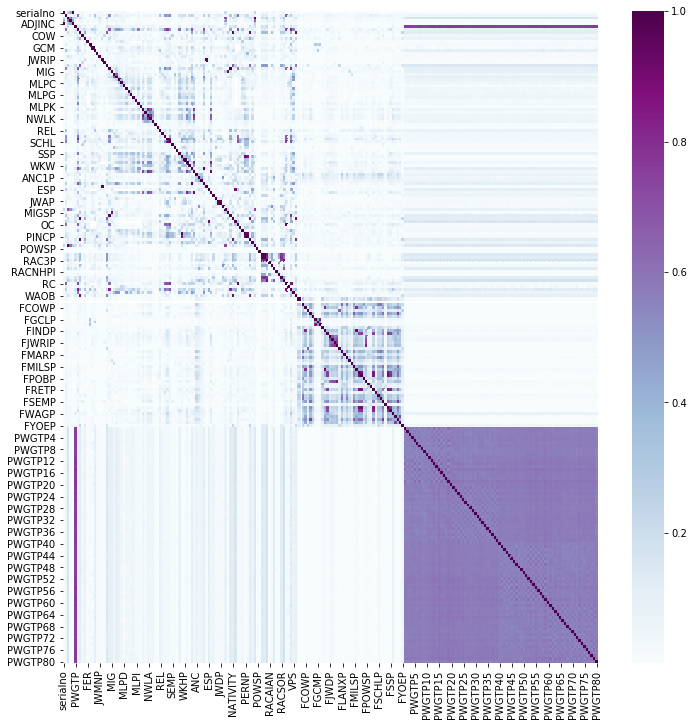

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df.corr()), cmap ='BuPu')

In [11]:
df.columns[-80:]

Index(['PWGTP1', 'PWGTP2', 'PWGTP3', 'PWGTP4', 'PWGTP5', 'PWGTP6', 'PWGTP7',
       'PWGTP8', 'PWGTP9', 'PWGTP10', 'PWGTP11', 'PWGTP12', 'PWGTP13',
       'PWGTP14', 'PWGTP15', 'PWGTP16', 'PWGTP17', 'PWGTP18', 'PWGTP19',
       'PWGTP20', 'PWGTP21', 'PWGTP22', 'PWGTP23', 'PWGTP24', 'PWGTP25',
       'PWGTP26', 'PWGTP27', 'PWGTP28', 'PWGTP29', 'PWGTP30', 'PWGTP31',
       'PWGTP32', 'PWGTP33', 'PWGTP34', 'PWGTP35', 'PWGTP36', 'PWGTP37',
       'PWGTP38', 'PWGTP39', 'PWGTP40', 'PWGTP41', 'PWGTP42', 'PWGTP43',
       'PWGTP44', 'PWGTP45', 'PWGTP46', 'PWGTP47', 'PWGTP48', 'PWGTP49',
       'PWGTP50', 'PWGTP51', 'PWGTP52', 'PWGTP53', 'PWGTP54', 'PWGTP55',
       'PWGTP56', 'PWGTP57', 'PWGTP58', 'PWGTP59', 'PWGTP60', 'PWGTP61',
       'PWGTP62', 'PWGTP63', 'PWGTP64', 'PWGTP65', 'PWGTP66', 'PWGTP67',
       'PWGTP68', 'PWGTP69', 'PWGTP70', 'PWGTP71', 'PWGTP72', 'PWGTP73',
       'PWGTP74', 'PWGTP75', 'PWGTP76', 'PWGTP77', 'PWGTP78', 'PWGTP79',
       'PWGTP80'],
      dtype='object')

After inspecting the heat map and checking the data dictionary we observe that the last 80 variables are basically different encodings of the individuals 'weight'.  We will remove all but one of these variables as including all the others provides no additional information.

In [51]:
#remove the last 82 correlated variables
df = df.iloc[:,:-82]

In [53]:
pd.set_option('display.max_rows', 250)

In [78]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24519 entries, 0 to 49999
Data columns (total 129 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   serialno  24519 non-null  int64  
 1   RT        24519 non-null  object 
 2   SPORDER   24519 non-null  int64  
 3   PUMA      24519 non-null  int64  
 4   ST        24519 non-null  int64  
 5   PWGTP     24519 non-null  int64  
 6   AGEP      24519 non-null  int64  
 7   CIT       24519 non-null  int64  
 8   COW       24519 non-null  float64
 9   ENG       24519 non-null  float64
 10  FER       24519 non-null  float64
 11  GCL       24519 non-null  float64
 12  GCM       24519 non-null  float64
 13  GCR       24519 non-null  float64
 14  INTP      24519 non-null  float64
 15  JWMNP     24519 non-null  float64
 16  JWRIP     24519 non-null  float64
 17  JWTR      24519 non-null  float64
 18  LANX      24519 non-null  float64
 19  MAR       24519 non-null  int64  
 20  MIG       24519 non-null  f

We will remove the variable columns that are of dtype 'object' as they are not suitable for our machine learning model.
The code below selects the column names and adds them to a list  'columns_to_drop'.

In [52]:
#select variables of type 'object' to be dropped from our model. 
columns_to_drop = df.select_dtypes(include=['object']).describe().columns

#'FPERNP','FPINCP',
print(columns_to_drop)

Index(['RT', 'NAICSP', 'SOCP'], dtype='object')


Refering once again to the data dictionary, we find that the below variables are basically close proxies for our dependent variable 'individual income'('WAGP'). We are therefore going to drop these variables as including them would negate the practical usefulness of our model.

In [53]:
#variables that are basically proxies for income
columns_to_drop = np.append(columns_to_drop,['ADJINC','OIP','PAP','RETP','SEMP','SSP','PERNP','PINCP','POVPIP','FINTP',\
                     'FRETP','FSSP','FWAGP'])
print(columns_to_drop)

['RT' 'NAICSP' 'SOCP' 'ADJINC' 'OIP' 'PAP' 'RETP' 'SEMP' 'SSP' 'PERNP'
 'PINCP' 'POVPIP' 'FINTP' 'FRETP' 'FSSP' 'FWAGP']


In [54]:
df.drop(columns_to_drop, inplace=True, axis=1)

df.fillna(0, inplace=True)

In [55]:
df.drop(df[df['WAGP']==0].index, inplace=True)

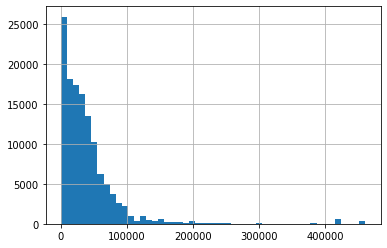

In [56]:
df['WAGP'].hist(bins=50)

In [65]:
df.shape

(24519, 129)

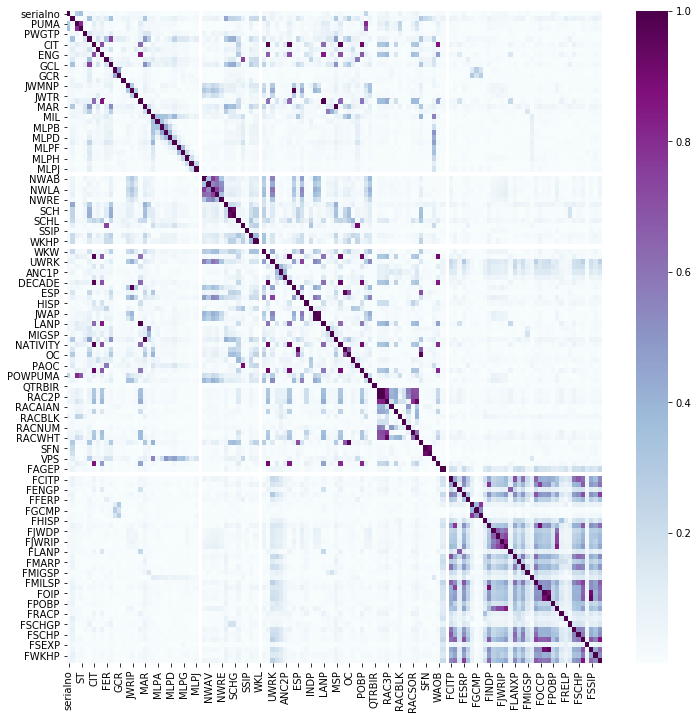

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df.corr()), cmap='BuPu')

In [57]:
vc_nulls = df.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() # if you want a histogram of these counts

# or if you wanted to plot the null count of each column as a bar

vc_nulls.hist(figsize=(8,8))#plot(kind = 'bar', figsize=(10,10))

KeyError: True

## Machine Learning Model: Random Forest

For this study we propose to use a Random Forest Clasifier as our model of choice. This model generally has a good performanc when there is a large number of predictor variables.

Our task will be to predict the the income class of an individual based on the other data normally provided during the government census.

We begin by splitting our data into higher and lower income levels with the median income of the sample population as our cut-off point. This will form the basis for our classification task.

In [ ]:
# print sample median of the data
print(df['WAGP'].median()) 

# Convert our income predictor variable to labels based on median value
df['WAGP'] = (df['WAGP'] > df['WAGP'].median()).astype(int) 

Now we divide our data into training and test samples. We will train our model on 80% of the data and reserve 20% to test the model performance.

In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

To select our model parameters we will use 4-fold cross-validation with our parameter values given. RandimisedSearchCV is a cross validation method that uses a random sample from the parameter space rather than perform an exhaustive search which is a time and resource intensive.

In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [66]:
#random_grid

Now we create our base classifier and fit our model to the training data.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train.drop('WAGP', axis=1), train['WAGP'])

In [65]:
pred = rf_random.predict(test.drop('WAGP', axis=1))
from sklearn.metrics import accuracy_score
accuracy_score(test['WAGP'], pred)

0.840072159692537

In [183]:
# #df3 = df
# df = df[df['WAGP']!=0]

## Conclusion

Overall our model has shown a decent performance on classifying individual income class using 64 predictors from the census data. We achieved a prediction accuracy of 83% on the test data while using a training data with a sample size of 400,000.

Going forward we will explore improvements that can be made to this model through the following avenues:
- increasing the size of the data used to train the model
- increasing the number of iterations on the randomised paraemeter sampling

Another area of exploration we will carry out is to carry out a dep investigation to determine pararmeter importance in the model. If we can figure out the minimum amount of parameters needed to get a desired level of prediction accuracy, this could have tthe real world application of reducing the cost of making these predictions by reducing the overall cost of acquiring the required data. 